In [1]:
from array import array
import math
import numpy as np
import random

In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x

In [3]:
m = 1 #Set the order of the polynomial
n = 15 #Set the number of data points
jitter = array('d')
jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
sigma = array('d')
sigma = [4,4,2,2,1,4,4,2,2,1,4,4,2,2,1]

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
par = array('d')
par.append(1.80)
par.append(4.05)

random.seed(1)

for i in range(0,n):
    x.append(-4.0+8.0*i/n)
    y.append(generator_function(x[i],par)+jitter[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

A matrix = 
[[ 4.875       2.        ]
 [ 2.         25.59111111]]
V matrix = 
[[ 16.875]
 [107.844]]
A_inverse = 
[[ 0.21192297 -0.01656223]
 [-0.01656223  0.04037044]]
Diagonal Check:
[[ 1.00000000e+00 -4.05028985e-18]
 [-4.31432583e-17  1.00000000e+00]]
Coefficients:
[[1.79006266]
 [4.07422227]]


In [8]:
yfit = 0
chi2 = 0
for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

i = 0  y = -16.400000  yfit = -14.506826
i = 1  y = -10.240000  yfit = -12.333908
i = 2  y = -11.080000  yfit = -10.160989
i = 3  y = -6.920000  yfit = -7.988071
i = 4  y = -5.760000  yfit = -5.815152
i = 5  y = -5.600000  yfit = -3.642234
i = 6  y = 0.560000  yfit = -1.469315
i = 7  y = -0.280000  yfit = 0.703603
i = 8  y = 3.880000  yfit = 2.876522
i = 9  y = 5.040000  yfit = 5.049440
i = 10  y = 5.200000  yfit = 7.222359
i = 11  y = 11.360000  yfit = 9.395278
i = 12  y = 10.520000  yfit = 11.568196
i = 13  y = 14.680000  yfit = 13.741115
i = 14  y = 15.840000  yfit = 15.914033
chi2/dof = 2.985467 / 13.000000


In [9]:
for k in range(0,m+1):
    print("k = %d, err = %f" % (k,math.pow(ainv[k][k],0.5)))

k = 0, err = 0.460351
k = 1, err = 0.200924


In [10]:
xfiterr = array('d')
yfitplus = array('d')
yfitminus = array('d')

for i in range(0,101):
    xfiterr.append(-5.0+10.0*i/100)
    yerror = 0.0
    yval = 0.0
    for k in range(0,m+1):
        yerror = yerror + math.pow((math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)),2)
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfitplus.append(yval+math.sqrt(yerror))
    yfitminus.append(yval-math.sqrt(yerror))
    print(i,xfiterr[i],yfitplus[i],yfitminus[i])

0 -5.0 -17.47597671493998 -19.686120615780194
1 -4.9 -17.08678823649317 -19.260464641194737
2 -4.8 -16.6975330985554 -18.834875326100235
3 -4.7 -16.30820784298654 -18.40935612863683
4 -4.6 -15.918808783036893 -17.983910735554204
5 -4.5 -15.529331985578274 -17.55854307998056
6 -4.4 -15.139773251823584 -17.133257360702984
7 -4.3 -14.75012809640774 -16.708058063086554
8 -4.2 -14.360391724694725 -16.282949981767302
9 -4.1 -13.9705590081681 -15.857938245261655
10 -4.0 -13.580624457755766 -15.433028342641725
11 -3.9 -13.190582194934272 -15.00822615243095
12 -3.8 -12.800425920454943 -14.583537973878007
13 -3.7 -12.410148880533425 -14.15897056076726
14 -3.6 -12.019743830347844 -13.734531157920573
15 -3.5 -11.629202994699499 -13.31022754053665
16 -3.4 -11.23851802570562 -12.886068056498257
17 -3.3 -10.847679957418572 -12.462061671753036
18 -3.2 -10.45667915730224 -12.038218018837103
19 -3.1 -10.065505274547615 -11.61454744855946
20 -3.0 -9.67414718527945 -11.191061084795356
21 -2.9 -9.282592934

Welcome to JupyROOT 6.18/00
Fit 1: 2.985467 13.000000 



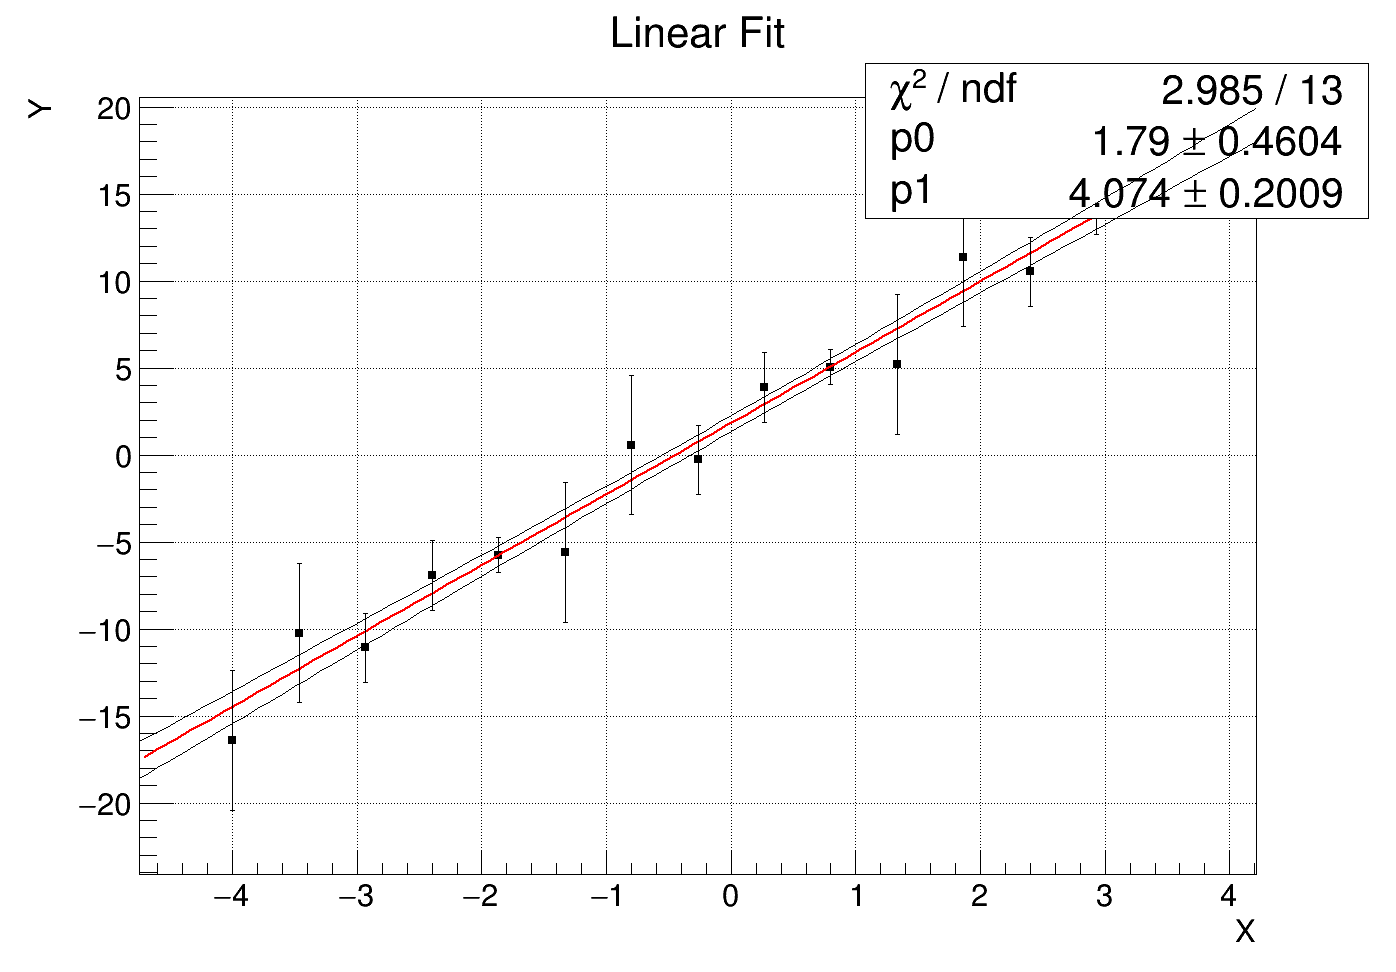

In [11]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Simple Linear Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(101,xfiterr,yfitplus)
grm = TGraph(101,xfiterr,yfitminus)

pfit1 = TF1("pfit1","pol1")
gr.SetMarkerStyle(21)
gr.SetTitle("Linear Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.Draw("L")
grm.Draw("L")
c1.Draw()